# Titanic Dataset

### 1.0 Importing libraries and data

In [2]:
#importing the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set
%matplotlib inline
#plt.rcParams['figure.dpi'] = 200
import missingno as msno
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [3]:
training_data=pd.read_csv('/kaggle/input/titanic/train.csv')
test_data=pd.read_csv('/kaggle/input/titanic/test.csv')

### 2. EDA (Exploratory data analysis)

I will take a look at the general info about data

In [4]:
#exploring data
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#checking data types and missing values
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


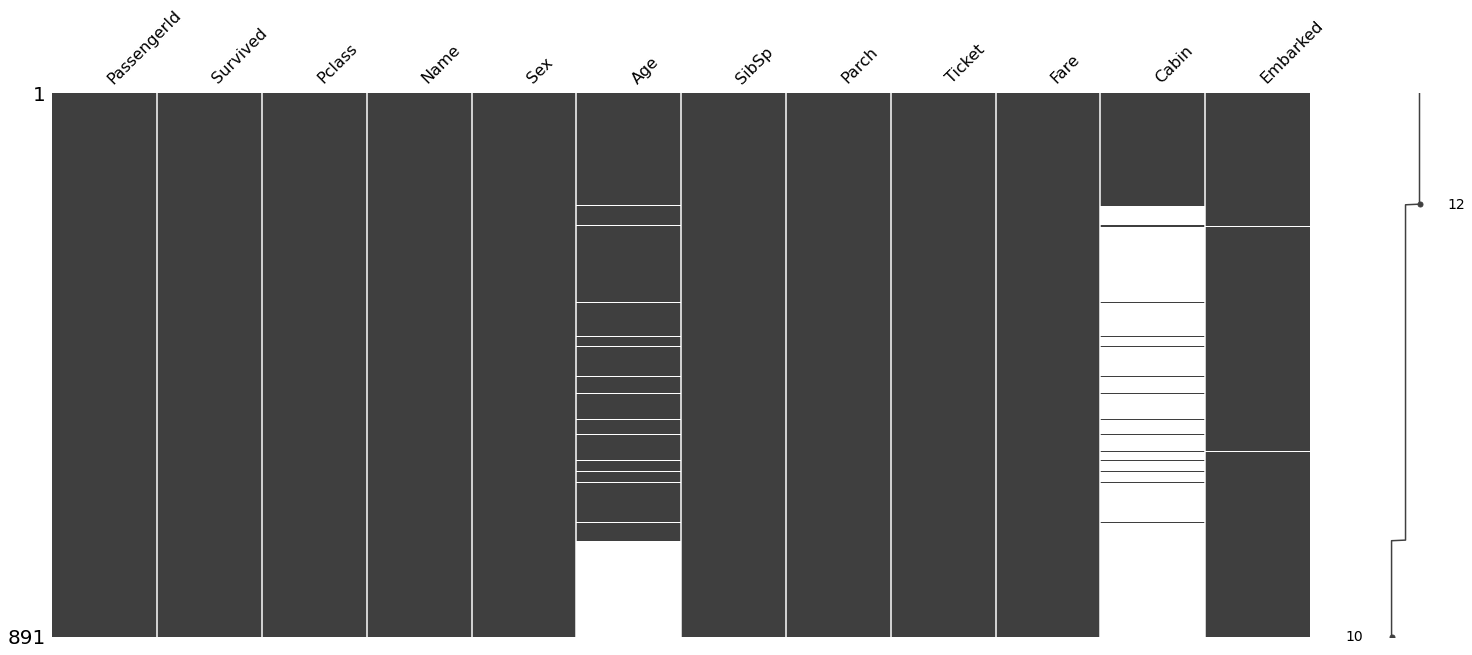

In [6]:
#visualising missing values
msno.matrix(training_data, sort='descending')

In [7]:
training_data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Gee, Mr. Arthur H",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


We are aware that mostly women survived, let's see more precisely.


In [8]:
women = training_data.loc[training_data.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)
print("% of women who survived:", rate_women)

men = training_data.loc[training_data.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)
print("% of men who survived:", rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


I will now explore all the variables individually.

## 2.1 Numerical Variables
To understand and get familiar with the data, I will start by exploring the numerical data with the aim to see how 
the different variables relate to the survival rate

          Survived       Age     SibSp     Parch      Fare
Survived  1.000000 -0.077221 -0.035322  0.081629  0.257307
Age      -0.077221  1.000000 -0.308247 -0.189119  0.096067
SibSp    -0.035322 -0.308247  1.000000  0.414838  0.159651
Parch     0.081629 -0.189119  0.414838  1.000000  0.216225
Fare      0.257307  0.096067  0.159651  0.216225  1.000000


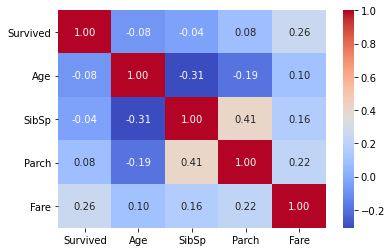

In [9]:
#let's look at the correlations first
df_num=training_data[['Survived','Age','SibSp','Parch','Fare']]
print(df_num.corr())
sns.heatmap(df_num.corr(),annot=True, fmt = ".2f",cmap = "coolwarm")

### 2.1.1 Age

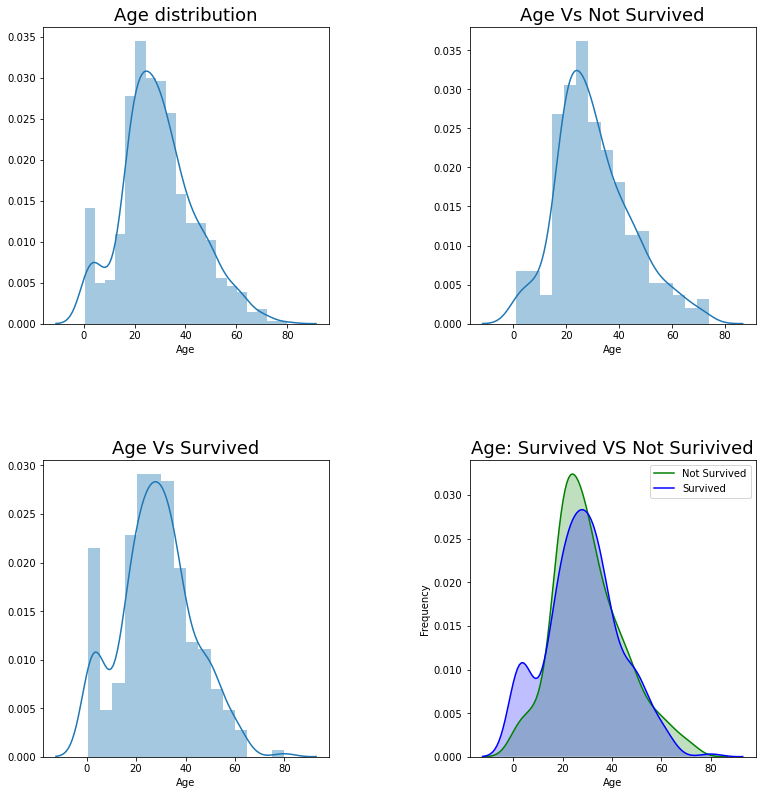

In [10]:
fig, axs = plt.subplots(2, 2, figsize = (12,12)) 

ax1 = plt.subplot2grid((8,8), (0,0), rowspan=3, colspan=3) 
ax2 = plt.subplot2grid((8,8), (4,0), rowspan=3, colspan=3)
ax3 = plt.subplot2grid((8,8), (0, 4), rowspan=3, colspan=3)
ax4 = plt.subplot2grid((8,8), (4, 4), rowspan=3, colspan=3)

fig.tight_layout()

ax1.set_title("Age distribution", fontsize =18)
ax2.set_title("Age Vs Survived", fontsize =18)
ax3.set_title("Age Vs Not Survived", fontsize =18)
ax4.set_title("Age: Survived VS Not Surivived", fontsize =18)

# Plot 1
sns.distplot(training_data['Age'], ax=ax1)

#Plot 2
sns.distplot(training_data["Age"][(training_data["Survived"] == 1) & (training_data["Age"].notnull())], ax=ax2)

#Plot 3
sns.distplot(training_data["Age"][(training_data["Survived"] == 0) & (training_data["Age"].notnull())], ax=ax3)

#Plot 4
g2=sns.kdeplot(training_data["Age"][(training_data["Survived"] == 0) & (training_data["Age"].notnull())], color='Green',shade = True, ax=ax4)
g2=sns.kdeplot(training_data["Age"][(training_data["Survived"] == 1) & (training_data["Age"].notnull())], color='Blue',shade = True, ax=ax4)
g2.set_xlabel("Age")
g2.set_ylabel("Frequency")
g2 = g2.legend(["Not Survived","Survived"])


We can see that children have a good survival chance while the group of age 60-75 has quite low chances.
### 2.1.2 SibSp (Sibling or Spouse)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


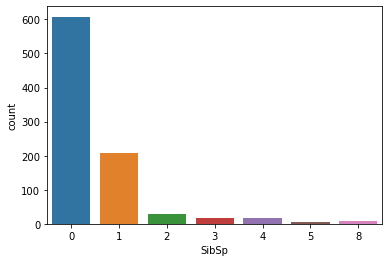

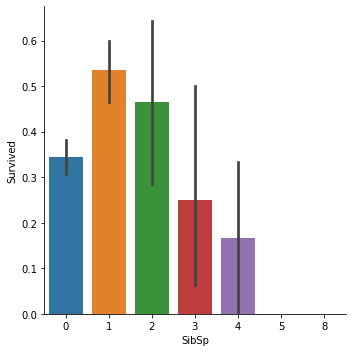

In [11]:
sns.countplot(training_data["SibSp"])
sns.factorplot(x="SibSp",y="Survived",data=training_data,kind="bar")

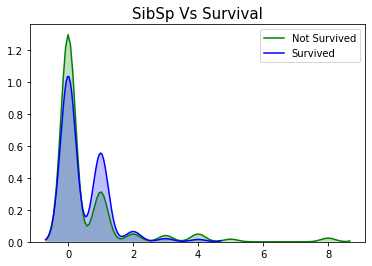

In [12]:
g=sns.kdeplot(training_data["SibSp"][(training_data["Survived"] == 0)], color='Green',shade = True)
g=sns.kdeplot(training_data["SibSp"][(training_data["Survived"] == 1)], color='Blue',shade = True)

g.set_title('SibSp Vs Survival', fontsize=15)
g = g.legend(["Not Survived","Survived"])

We can see that people that had 0 to 2 siblings/spouses had better survival rates.
### 2.1.3 Parch (Parent/children)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


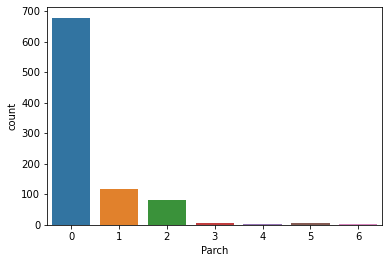

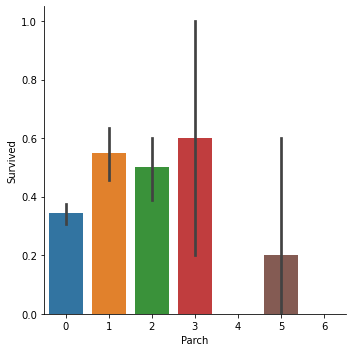

In [13]:
sns.countplot(training_data["Parch"])
sns.factorplot(x="Parch",y="Survived",data=training_data,kind="bar")


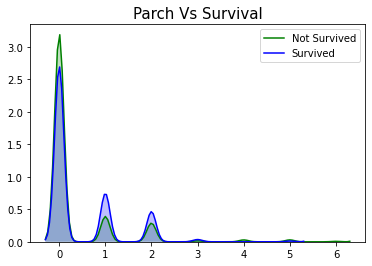

In [14]:
g=sns.kdeplot(training_data["Parch"][(training_data["Survived"] == 0)], color='Green',shade = True, bw= 0.1)
g=sns.kdeplot(training_data["Parch"][(training_data["Survived"] == 1)], color='Blue',shade = True, bw= 0.1)

g.set_title('Parch Vs Survival', fontsize=15)
g = g.legend(["Not Survived","Survived"])

We can see that small families up to the values of 2-3 (which has a very important std) have quite good chances of survival compared to bigger ones.

In [15]:
pd.crosstab(training_data.Parch,training_data.Pclass)

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


Not surprisingly, the biggest families are from 3rd class.
### 2.1.4 Fare

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <a list of 10 Patch objects>)

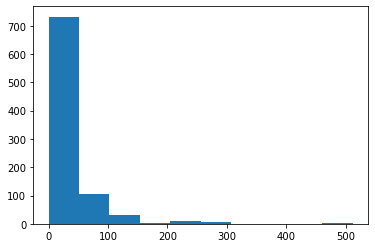

In [16]:
plt.hist(training_data["Fare"])

The fare graph, given it skewness, seems to suggest that most passengers are from the third class (lower fares)

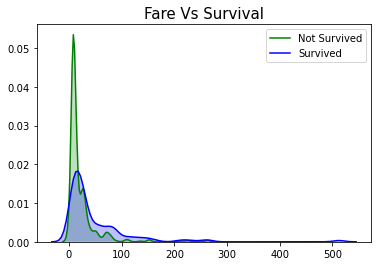

In [17]:
g=sns.kdeplot(training_data["Fare"][(training_data["Survived"] == 0)], color='Green',shade = True)
g=sns.kdeplot(training_data["Fare"][(training_data["Survived"] == 1)], color='Blue',shade = True)

g.set_title('Fare Vs Survival', fontsize=15)
g = g.legend(["Not Survived","Survived"])

This seems to be confirmed by the fact that higher fares have better survival rates and also by the graph below

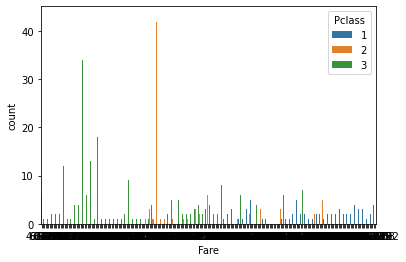

In [18]:
sns.countplot(training_data["Fare"], hue=training_data['Pclass'])

## 2.2 Categorical Variables
### 2.2.1 Sex

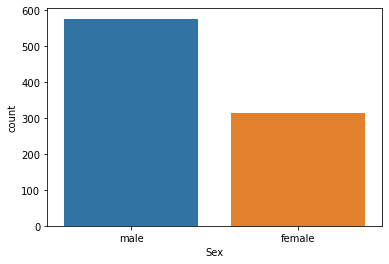

In [19]:
sns.countplot(training_data['Sex'])

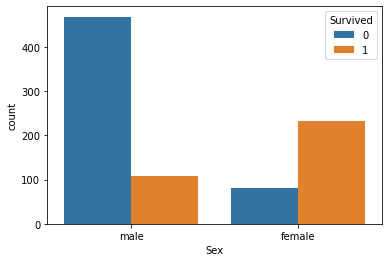

In [20]:
sns.countplot(training_data['Sex'], hue=training_data['Survived'])

As we already knew, around 19% of men and 75% of women survived, even though the vast majority of the passengers were men.
### 2.2.2 Pclass (Passenger class)

This is a very interesting variable as my assumption is that class, being a proxy for wealth, plays a big role in terms of survival opportunities; we already had a couple of hints, while exploring the "Fare" and " Parch" variables.

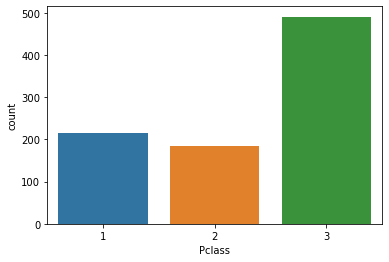

In [21]:
sns.countplot(training_data['Pclass'])

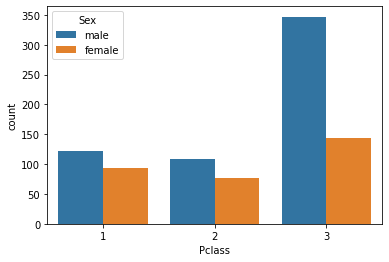

In [22]:
sns.countplot(x="Pclass", hue="Sex", data=training_data)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3675: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


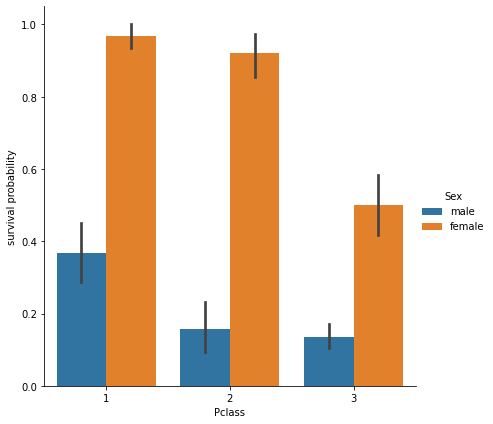

In [23]:
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=training_data,
                   size=6, kind="bar")
g = g.set_ylabels("survival probability")

The assumption seems indeed confirmed, especially for women. Women from the first two classes have basically 100% chance of survival. It is interesting to note that even if men from the first class have lower chances compared to women from the third class, they still are around three more likely to save themselves compared to men from the 3rd class. 

### 2.2.3 Embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
Since we have only two missing values, it makes sense to replace them with the mode

In [24]:
#Replacing Embarked nan values with the most frequent value
training_data["Embarked"] = training_data["Embarked"].fillna("S")

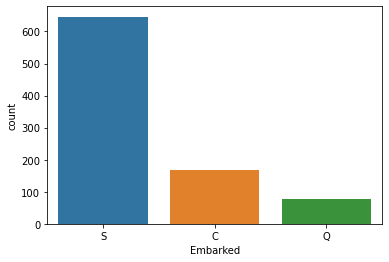

In [25]:
sns.countplot(training_data['Embarked'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


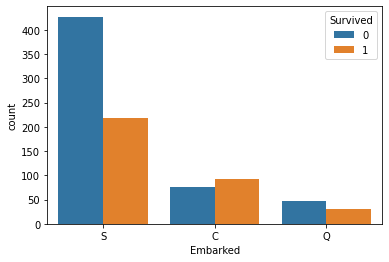

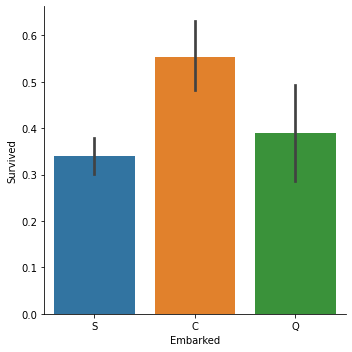

In [26]:
sns.countplot(training_data['Embarked'], hue=training_data['Survived'])
g = sns.factorplot(x="Embarked", y="Survived",  data=training_data, kind='bar')

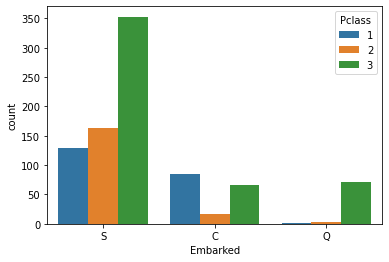

In [27]:
sns.countplot(training_data['Embarked'], hue=training_data['Pclass'])

We can see that people that embarked at Cherbourg have the highest survival chances. It is interesting to note that people embarking at Queenstown, have quite good chances, even though they are mostly 3rd class passengers.

### 2.2.4 Cabin

In [28]:
training_data['Cabin'].isnull().sum()

687

we have a lot of missing values; let us understand the variable some more

In [29]:
training_data["Cabin"][training_data["Cabin"].notnull()]

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

In [30]:
training_data['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

This variable is quite messy and difficult to read. 
It could be useful to group togheter the null values (X) and sort the other ones with their first letter.

In [31]:
training_data["Cabin"] = pd.Series([i[0] if not pd.isnull(i) else 'X' for i in training_data['Cabin'] ])

In [32]:
training_data["Cabin"].value_counts()

X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

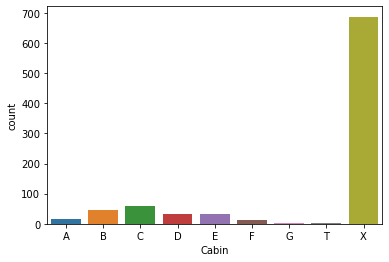

In [33]:
sns.countplot(training_data["Cabin"],order=['A','B','C','D','E','F','G','T','X'])

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


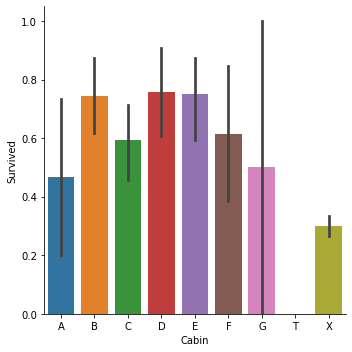

In [34]:
    g = sns.factorplot(x="Cabin", y="Survived",order=['A','B','C','D','E','F','G','T','X'],data=training_data, kind='bar')

We can see that the cabins without a name are the ones that accommodate most people and that at the same time are the ones with the worst survival rates

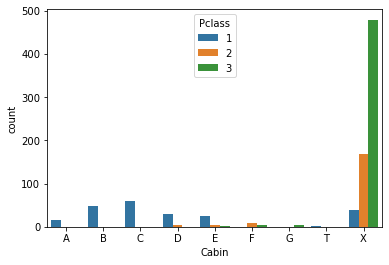

In [35]:
g = sns.countplot(training_data["Cabin"],order=['A','B','C','D','E','F','G','T','X'], hue=training_data["Pclass"])

Almost all of the passengers from the third class belong to it, maybe the cabin with letters are associated with big rooms fancy rooms? (or maybe not considering that almost all of the second class passengers don't have a cabin number). 
However, unfortunately, there are way too many missing also in the test data (327 out of 418, that's 78%) and it would probably be better to drop it.
### 2.2.5 Name

In [36]:
training_data['Name'].value_counts()

Gee, Mr. Arthur H                                       1
Bowen, Mr. David John "Dai"                             1
Hagland, Mr. Ingvald Olai Olsen                         1
Hedman, Mr. Oskar Arvid                                 1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
                                                       ..
Turpin, Mr. William John Robert                         1
Johnston, Mr. Andrew G                                  1
de Mulder, Mr. Theodore                                 1
van Billiard, Mr. Austin Blyler                         1
Vanden Steen, Mr. Leo Peter                             1
Name: Name, Length: 891, dtype: int64

The Name variable has an interesting feature: it contains the title of the individuals. Let's see if we can extract some valuable information.

In [37]:
df_title = [i.split(",")[1].split(".")[0].strip() for i in training_data["Name"]]
training_data["Title"] = pd.Series(df_title)
training_data["Title"].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Sir               1
Lady              1
Ms                1
Don               1
the Countess      1
Capt              1
Jonkheer          1
Mme               1
Name: Title, dtype: int64

There are very few titles that are not "Mr" or "Miss" or "Mrs". We could group them togheter and check their survival rates

In [38]:
# Converting into categorical values
#training data
training_data["Title"] = training_data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special Title')
training_data["Title"] = training_data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Special Title":3})
training_data["Title"] = training_data["Title"].astype(int)

In [39]:
#test data
df_title_test = [i.split(",")[1].split(".")[0].strip() for i in test_data["Name"]]
test_data["Title"] = pd.Series(df_title_test)

In [40]:
#test data
test_data["Title"] = test_data["Title"].replace(['Lady', 'the Countess','Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Special Title')
test_data["Title"] = test_data["Title"].map({"Master":0, "Miss":1, "Ms" : 1 , "Mme":1, "Mlle":1, "Mrs":1, "Mr":2, "Special Title":3})
test_data["Title"] = test_data["Title"].astype(int)

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


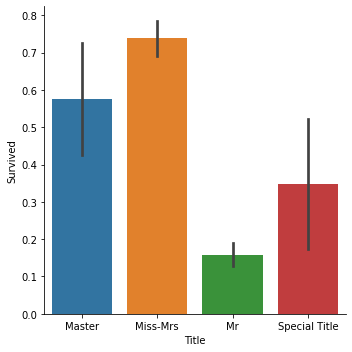

In [41]:
g=sns.factorplot(x="Title",y="Survived",data=training_data,kind="bar")
g = g.set_xticklabels(["Master","Miss-Mrs","Mr","Special Title"])

In [42]:
M=training_data.copy()
Master=M[(M.Title==0)]
Master

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,X,S,0
16,17,0,3,"Rice, Master. Eugene",male,2.00,4,1,382652,29.1250,X,Q,0
50,51,0,3,"Panula, Master. Juha Niilo",male,7.00,4,1,3101295,39.6875,X,S,0
59,60,0,3,"Goodwin, Master. William Frederick",male,11.00,5,2,CA 2144,46.9000,X,S,0
63,64,0,3,"Skoog, Master. Harald",male,4.00,3,2,347088,27.9000,X,S,0
65,66,1,3,"Moubarek, Master. Gerios",male,NaN,1,1,2661,15.2458,X,C,0
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,X,S,0
125,126,1,3,"Nicola-Yarred, Master. Elias",male,12.00,1,0,2651,11.2417,X,C,0
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,X,S,0
164,165,0,3,"Panula, Master. Eino Viljami",male,1.00,4,1,3101295,39.6875,X,S,0


We can see that the people with the title "Master" are children (0 - 12 years).
### 2.2.6 Ticket

In [43]:
training_data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [44]:
training_data['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
CA 2144     6
           ..
236852      1
345777      1
370369      1
11765       1
330932      1
Name: Ticket, Length: 681, dtype: int64

This variable is not quite easy to read, the only thing that is evident is that it contains some tickets with numbers only and some others with a prefix. These prefixes don't look like they are connected with the cabins.
I will try to see if diving them into 2 categories (numbers and letters) can bring a better insight.

In [45]:
Ticket = []
for i in list(training_data.Ticket):
    if  i.isdigit() :
        Ticket.append('Number')
    else:
        Ticket.append("Letter")
Ticket

['Letter',
 'Letter',
 'Letter',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Letter',
 'Number',
 'Letter',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Letter',
 'Letter',
 'Number',
 'Letter',
 'Letter',
 'Number',
 'Number',
 'Letter',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Letter',
 'Number',
 'Letter',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Letter',
 'Letter',
 'Number',
 'Number',
 'Number',
 'Letter',
 'Number',
 'Letter',
 'Letter',
 'Number',
 'Number',
 'Number',
 'Number',
 'Letter',
 'Number',
 'Letter',
 'Letter',
 'Number',
 'Number',
 'Letter',
 'Letter',
 'Letter',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Number',
 'Letter',
 'Number',
 'Letter',
 'Letter',
 'Number',
 'Number',
 'Number',

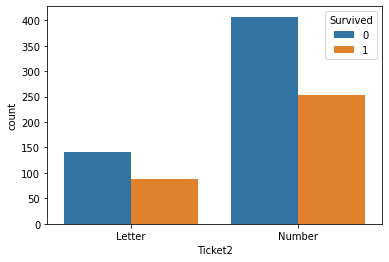

In [46]:
training_data['Ticket2']=Ticket
sns.countplot(x=training_data['Ticket2'],hue=training_data['Survived'])

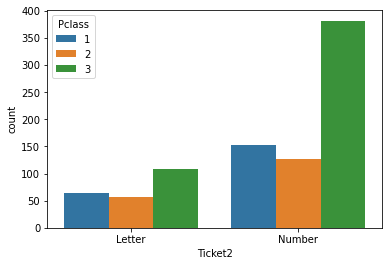

In [47]:
sns.countplot(x=training_data['Ticket2'],hue=training_data['Pclass'])

We can see that the majority of the tickets are "number tickets" but it seems that this new division does not bring much clarification in terms of the problem. It could be considered dropping the variable.

## 3. Feature Engineering
All the variables seem to bring information apart from "Passenger ID","Ticket" and "Cabin".
We also discovered some interesting things along the way. Passenger class means a lot in terms of survival rates.
Age and family dimension play a role too. It might be wise to engineer a little "SibSp" and "Parch". 
Title has already been addressed during the exploratory analysis. 

### 3.1 Age
First, the missing Age values need to be addressed.

In [48]:
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,2,Letter
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,Letter
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,1,Letter
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,1,Number
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,X,S,2,Number


The median seems a good option to replace the missing values. It also makes to transform this variable into a categorical one. I'll use five bins to divide the variable (range: 0-80).


In [49]:
#training data
training_data['Age']=training_data['Age'].fillna(training_data['Age'].median())

#test data
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())

In [50]:
#training data
training_data['Age_band']=0
training_data.loc[training_data['Age']<=16,'Age_band']=0
training_data.loc[(training_data['Age']>16)&(training_data['Age']<=32),'Age_band']=1
training_data.loc[(training_data['Age']>32)&(training_data['Age']<=48),'Age_band']=2
training_data.loc[(training_data['Age']>48)&(training_data['Age']<=64),'Age_band']=3
training_data.loc[training_data['Age']>64,'Age_band']=4

#test data
test_data['Age_band']=0
test_data.loc[test_data['Age']<=16,'Age_band']=0
test_data.loc[(test_data['Age']>16)&(test_data['Age']<=32),'Age_band']=1
test_data.loc[(test_data['Age']>32)&(test_data['Age']<=48),'Age_band']=2
test_data.loc[(test_data['Age']>48)&(test_data['Age']<=64),'Age_band']=3
test_data.loc[test_data['Age']>64,'Age_band']=4

In [51]:
training_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Ticket2,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,X,S,2,Letter,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,1,Letter,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,X,S,1,Letter,1


### 3.2 Family size
It would also make sense to combine the SibSp and Parch variables into a single one that will be named Familysize

In [52]:
# Creating family size variable

#training data
training_data["Familysize"] = training_data["SibSp"] + training_data["Parch"] + 1

#test data
test_data["Familysize"] = test_data["SibSp"] + test_data["Parch"] + 1

/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


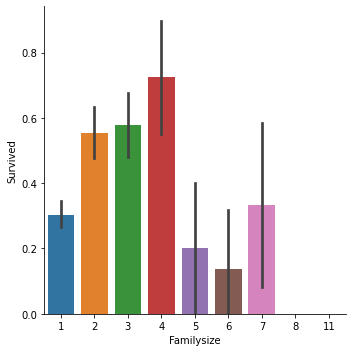

In [53]:
sns.factorplot(x="Familysize",y="Survived",data = training_data, kind='bar')

3.3 Fare

It would be a good idea to turn Fare into a categorical variable as well. I will use 3 bins.

In [54]:
training_data['Fare_Range']=pd.qcut(training_data['Fare'],3)
training_data.groupby(['Fare_Range'])['Survived'].mean().to_frame()

,Survived
Fare_Range,
"(-0.001, 8.662]",0.198052
"(8.662, 26.0]",0.402778
"(26.0, 512.329]",0.559322


In [55]:
#training data
training_data['Fare_cat']=0
training_data.loc[training_data['Fare']<=8.662,'Fare_cat']=0
training_data.loc[(training_data['Fare']>8.662)&(training_data['Fare']<=26.0),'Fare_cat']=1
training_data.loc[(training_data['Fare']>26.0)&(training_data['Fare']<=513),'Fare_cat']=2
training_data.head()

#test data
test_data['Fare']=test_data['Fare'].fillna(test_data['Fare'].mean())#replacing the one missing value with the mean

In [56]:
#test data
test_data['Fare_cat']=0
test_data.loc[test_data['Fare']<=8.662,'Fare_cat']=0
test_data.loc[(test_data['Fare']>8.662)&(test_data['Fare']<=26.0),'Fare_cat']=1
test_data.loc[(test_data['Fare']>26.0)&(test_data['Fare']<=513),'Fare_cat']=2
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_band,Familysize,Fare_cat
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,2,2,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1,2,2,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,2,3,1,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,2,1,1,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1,1,3,1


Lastly, the variables Sex and Embarked need to be remapped.

In [57]:
#training data
training_data['Sex']=training_data['Sex'].map({'male':0,"female":1})
training_data['Embarked']=training_data['Embarked'].map({'S':0,"C":1,"Q":2})

#test data
test_data['Sex']=test_data['Sex'].map({'male':0,"female":1})
test_data['Embarked']=test_data['Embarked'].map({'S':0,"C":1,"Q":2})

Now that everything is ready I will create the X and Y variables for modelling.

In [58]:
#creating variables for training
X_train=training_data.drop(labels = ['PassengerId','Survived','Name','Age','SibSp','Parch','Ticket','Fare','Ticket2',
                           'Fare_Range','Cabin'], axis=1)
Y_train=training_data['Survived']
X_train

,Pclass,Sex,Embarked,Title,Age_band,Familysize,Fare_cat
0,3,0,0,2,1,2,0
1,1,1,1,1,2,2,2
2,3,1,0,1,1,1,0
3,1,1,0,1,2,2,2
4,3,0,0,2,2,1,0
...,...,...,...,...,...,...,...
886,2,0,0,3,1,1,1
887,1,1,0,1,1,1,2
888,3,1,0,1,1,4,1
889,1,0,1,2,1,1,2


In [59]:
#creating variables for test
X_test=test_data.drop(labels = ['PassengerId','Name','Age','SibSp','Parch','Ticket','Fare',
                           'Cabin'], axis=1)
X_test

,Pclass,Sex,Embarked,Title,Age_band,Familysize,Fare_cat
0,3,0,2,2,2,1,0
1,3,1,0,1,2,2,0
2,2,0,2,2,3,1,1
3,3,0,0,2,1,1,1
4,3,1,0,1,1,3,1
...,...,...,...,...,...,...,...
413,3,0,0,2,1,1,0
414,1,1,1,3,2,1,2
415,3,0,0,2,2,1,0
416,3,0,0,2,1,1,0


### 4. Modelling
I will use the main Classification algorithms:
 - Logistic Regression
 - KNN
 - SVM
 - Naive Bayes
 - Decision Tree
 - Random Forest
 - XGBoost

5 fold cross validation will be used.

In [60]:
#Logistic Regression
LR=LogisticRegression(random_state=1)
cv = cross_val_score(LR,X_train,Y_train,cv=5 )
print(cv)
print(cv.mean())
print("Logistic Regression:%0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

#KNN
KNN=KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2,)
cv = cross_val_score(KNN,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
print("KNN: %0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

#SVM
SVM=SVC(kernel='linear', random_state=1)
cv = cross_val_score(SVM,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
print("SVM: %0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

#Naive bayes
NB=GaussianNB()
cv = cross_val_score(NB,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
print("Naive Bayes: %0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

#Decision Tree
DT=DecisionTreeClassifier(criterion='entropy', random_state=1)
cv = cross_val_score(DT,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
print("Decision Tree: %0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

#Random Forest
RF=RandomForestClassifier(n_estimators= 100,criterion='entropy', random_state=1)
cv = cross_val_score(RF,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
print("Random Forest: %0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

XGB=XGBClassifier(random_state=1)
cv = cross_val_score(XGB,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
print("XGBoost: %0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

#XGBoost
XGB=XGBClassifier(random_state=1)
cv = cross_val_score(XGB,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
print("XGBoost: %0.2f accuracy with a standard deviation of %0.2f" % (cv.mean(), cv.std()))

[0.83240223 0.79213483 0.80898876 0.79775281 0.84831461]
0.8159186491745652
Logistic Regression:0.82 accuracy with a standard deviation of 0.02
[0.76536313 0.7752809  0.8258427  0.80337079 0.85393258]
0.804758018956751
KNN: 0.80 accuracy with a standard deviation of 0.03
[0.81564246 0.8258427  0.81460674 0.79213483 0.78651685]
0.8069487163392128
SVM: 0.81 accuracy with a standard deviation of 0.02
[0.74301676 0.80337079 0.80898876 0.78089888 0.84831461]
0.7969179586968803
Naive Bayes: 0.80 accuracy with a standard deviation of 0.03
[0.77653631 0.80337079 0.79775281 0.81460674 0.83707865]
0.8058690603226413
Decision Tree: 0.81 accuracy with a standard deviation of 0.02
[0.78212291 0.80337079 0.82022472 0.79775281 0.83707865]
0.8081099742640137
Random Forest: 0.81 accuracy with a standard deviation of 0.02
[0.78212291 0.80898876 0.8258427  0.82022472 0.84269663]
0.8159751428033394
XGBoost: 0.82 accuracy with a standard deviation of 0.02
[0.78212291 0.80898876 0.8258427  0.82022472 0.8426

I'll use gridsearch on the two best performing models: XGBoost and Logistic Regression


In [61]:
#Gridesearch XGB
XGB = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [None],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

grid_search=GridSearchCV(XGB, param_grid = param_grid, scoring="accuracy",cv = 5, verbose = True, n_jobs = -1)
grid_search.fit(X_train,Y_train)
print("best_accuracy:",grid_search.best_score_)
print("best_parameters:",grid_search.best_params_)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   21.2s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  2.0min finished


best_accuracy: 0.8316238779737619
best_parameters: {'colsample_bytree': 0.75, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': None, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.65}


In [62]:
#Gridesearch LogisticRegression

param_grid={"C":[0.001,0.01,0.1,1,10,100,1000], 
            "penalty":["l1","l2","elasticnet","none"],
            "dual":[True, False]}# l1 lasso l2 ridge
LR=LogisticRegression()
grid_search=GridSearchCV(LR, param_grid = param_grid, scoring="accuracy",cv = 5, verbose = True, n_jobs = -1)
grid_search.fit(X_train,Y_train)


print("best_accuracy:",grid_search.best_score_)
print("best_parameters:",grid_search.best_params_)

Fitting 5 folds for each of 56 candidates, totalling 280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 205 tasks      | elapsed:    0.5s


best_accuracy: 0.819295712761283
best_parameters: {'C': 0.1, 'dual': False, 'penalty': 'l2'}


[Parallel(n_jobs=-1)]: Done 280 out of 280 | elapsed:    0.7s finished


It looks like XGBoost can grant the best accuracy, so I will tune it with the parameters found using gridsearch and use it for predictions.
I also would like to take a look at the variable imporance in terms of "Gain".

In [63]:
XGB_Tuned=XGBClassifier(colsample_bytree= 0.75, gamma=2, learning_rate= 0.5, max_depth= None, 
                        min_child_weight=0.01, n_estimators= 450, reg_alpha= 1, 
                        reg_lambda=5, sampling_method='uniform',subsample=0.65, random_state=1)

XGB_Tuned.fit(X_train,Y_train)
f = 'gain'
print("Gain:",XGB_Tuned.get_booster().get_score(importance_type= f))

Gain: {'Title': 19.73551081728571, 'Sex': 1.7725328427500002, 'Fare_cat': 3.0824809996999996, 'Age_band': 2.3442246475, 'Familysize': 4.137151337466666, 'Pclass': 4.498664081565217, 'Embarked': 1.979800145111111}


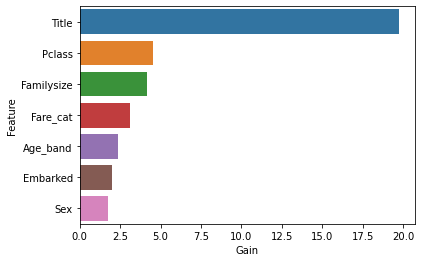

In [64]:
x={'Title': 19.73551081728571, 'Sex': 1.7725328427500002, 
   'Fare_cat': 3.0824809996999996, 'Age_band': 2.3442246475, 'Familysize': 4.137151337466666, 
   'Pclass': 4.498664081565217, 'Embarked': 1.979800145111111}
df = pd.DataFrame(list(x.items()),columns = ['Feature','Gain']).sort_values(by=['Gain'], ascending=False)
sns.barplot(x=df['Gain'],y=df['Feature'])

In [65]:
Y_hat = XGB_Tuned.predict(X_test).astype(int)
Y_hat


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [66]:
XGBsubmission = {'PassengerId': test_data.PassengerId, 'Survived': Y_hat}
submission_xgb = pd.DataFrame(data=XGBsubmission)
#submission_xgb.to_csv('xgb_submission.csv', index=False)